# Hospital Mortality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

from pycaret.classification import ClassificationExperiment

import os

save_path = os.path.join(os.path.expanduser('~'), 'models', 'hospital+motality')
data_path = os.path.join('..', '..', 'data', 'mortality.csv')

### Data ingestion

In [2]:
data = pd.read_csv(data_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [3]:
print(data.group.value_counts())
print(data.outcome.value_counts())

1    825
2    352
Name: group, dtype: int64
0.0    1017
1.0     159
Name: outcome, dtype: int64


In [5]:
# fill na values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# columns to be fitted are the float colum
columns_to_fill = ['BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'Creatine kinase', 'glucose', 'Blood calcium', 'PH', 'Lactic acid', 'PCO2']
imputer.fit(data[columns_to_fill])
data[columns_to_fill] = imputer.transform(data[columns_to_fill])
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1176 non-null   int64  
 1   ID                        1176 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1176 non-null   int64  
 4   gendera                   1176 non-null   int64  
 5   BMI                       1176 non-null   float64
 6   hypertensive              1176 non-null   int64  
 7   atrialfibrillation        1176 non-null   int64  
 8   CHD with no MI            1176 non-null   int64  
 9   diabetes                  1176 non-null   int64  
 10  deficiencyanemias         1176 non-null   int64  
 11  depression                1176 non-null   int64  
 12  Hyperlipemia              1176 non-null   int64  
 13  Renal failure             1176 non-null   int64  
 14  COPD    

### Data analysis

Exploratory data analysis is done using AutoViz. Get the notebook for that data under the folder ../autoviz/Hospital Mortality Viz.ipynb

### Model Training with PyCaret

In [7]:
target_label = 'outcome'
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=1)
for i, (train_index, test_index) in enumerate(stratified_shuffle_split.split(data,data[target_label])):
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    
print(train.shape)
print(test.shape)

(1058, 51)
(118, 51)


In [8]:
experiment = ClassificationExperiment()
experiment.setup(data, target = target_label, session_id = 123)

,Description,Value
0,Session id,123
1,Target,outcome
2,Target type,Binary
3,Original data shape,"(1176, 51)"
4,Transformed data shape,"(1176, 51)"
5,Transformed train set shape,"(823, 51)"
6,Transformed test set shape,"(353, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model = experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8882,0.8096,0.1970,0.8050,0.3036,0.2736,0.3568,4.4590
ridge,Ridge Classifier,0.8857,0.0000,0.2053,0.7800,0.3134,0.2771,0.3533,0.0230
gbc,Gradient Boosting Classifier,0.8845,0.7967,0.2409,0.7600,0.3441,0.3018,0.3685,0.0430
xgboost,Extreme Gradient Boosting,0.8845,0.7927,0.2598,0.6955,0.3684,0.3212,0.3717,0.0400
rf,Random Forest Classifier,0.8833,0.8086,0.1515,0.8167,0.2484,0.2214,0.3167,0.0700
lr,Logistic Regression,0.8809,0.7519,0.2242,0.6833,0.3229,0.2797,0.3350,0.2770
et,Extra Trees Classifier,0.8785,0.8322,0.1083,0.7500,0.1832,0.1630,0.2558,0.0750
lda,Linear Discriminant Analysis,0.8773,0.7812,0.2780,0.6219,0.3667,0.3122,0.3495,0.0240
lightgbm,Light Gradient Boosting Machine,0.8761,0.7880,0.1977,0.6750,0.2904,0.2457,0.3061,0.0800
svm,SVM - Linear Kernel,0.8651,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
experiment.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

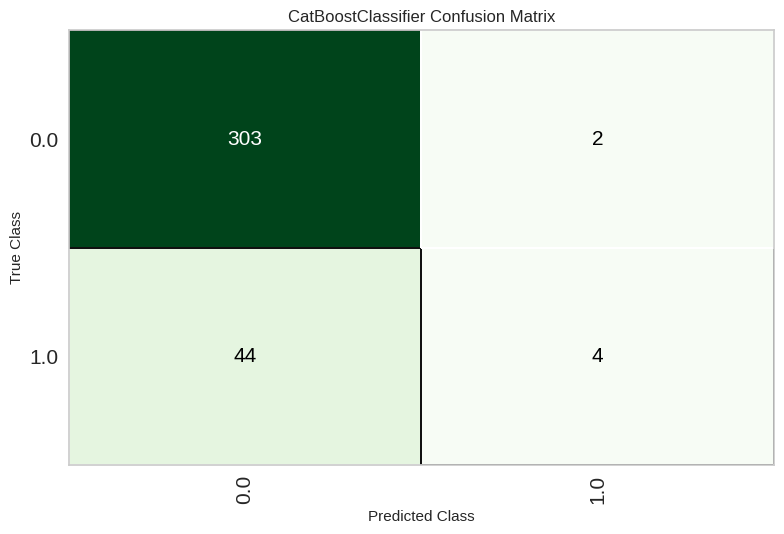

In [11]:
experiment.plot_model(best_model, plot = 'confusion_matrix')

In [12]:
# predict 
experiment.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8697,0.8276,0.0833,0.6667,0.1481,0.1216,0.2036


,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome,prediction_label,prediction_score
359,1,193734,65,2,30.188278,1,0,1,0,0,...,12.375000,2.200000,7.420000,25.375000,1.666667,35.000000,25,0.0,0,0.9166
149,1,196422,72,2,24.368498,1,0,0,0,0,...,10.000000,2.000000,7.380000,46.599998,1.150000,79.666664,55,0.0,0,0.9837
82,1,193330,81,1,34.163334,1,1,0,0,0,...,17.000000,2.009091,7.330000,22.363636,1.000000,39.750000,55,0.0,0,0.9195
425,1,127683,77,1,40.392597,1,0,0,1,0,...,15.000000,2.914286,7.381538,34.250000,1.840000,69.384613,55,1.0,0,0.9050
903,2,112554,48,1,27.695133,1,0,0,1,1,...,11.250000,1.850000,7.378532,30.500000,1.300000,45.535381,50,0.0,0,0.9884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,1,130036,64,2,36.537704,0,0,0,1,0,...,9.800000,2.000000,7.350833,32.400002,0.860000,62.500000,55,0.0,0,0.9841
627,1,195748,38,1,27.657663,0,0,0,0,0,...,16.615385,1.950000,7.418334,24.230770,3.512500,31.666666,15,0.0,0,0.7022
889,2,126602,75,2,30.188278,0,0,0,0,1,...,9.500000,1.925000,7.430000,34.750000,1.200000,50.000000,60,0.0,0,0.9519
902,2,101759,93,1,26.957214,1,1,0,0,0,...,12.384615,2.092308,7.400000,34.769230,1.300000,50.000000,30,0.0,0,0.9687


In [13]:
predictions = experiment.predict_model(best_model, data=test, )
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9492,0.9099,0.6875,0.9167,0.7857,0.7575,0.7676


,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome,prediction_label,prediction_score
684,1,102433,42,2,34.852142,1,0,0,0,0,...,14.777778,2.271429,7.450000,31.666666,1.853426,49.000000,55,0.0,0,0.9828
974,2,195565,73,1,27.277845,0,1,0,0,0,...,14.818182,2.510000,7.470000,23.363636,1.700000,32.000000,55,0.0,0,0.9432
766,1,136052,80,2,30.188278,1,0,1,0,1,...,19.384615,2.078571,7.305000,28.230770,1.853426,47.000000,55,0.0,0,0.9437
164,1,199745,45,2,47.718601,1,0,0,1,0,...,14.000000,1.927273,7.270588,25.636364,1.200000,53.176472,55,0.0,0,0.9862
710,1,190770,82,1,26.142670,1,1,0,0,0,...,16.818182,2.062500,7.378532,20.750000,1.853426,45.535381,55,1.0,1,0.6445


### Save and load this pipeline and model to/from disk

In [15]:
# save model
if not os.path.exists(save_path):
    os.makedirs(save_path)
experiment.save_model(best_model, save_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['group', 'ID', 'age', 'gendera',
                                              'BMI', 'hypertensive',
                                              'atrialfibrillation',
                                              'CHD with no MI', 'diabetes',
                                              'deficiencyanemias', 'depression',
                                              'Hyperlipemia', 'Renal failure',
                                              'COPD', 'heart rate',
                                              'Systolic blood pressure',
                                              'Diastolic blood pressure',
                                              'Resp...
                                     transformer=SimpleImputer(add_indicator=False,
                                                     

In [16]:
# load the model backup
experiment_2 = ClassificationExperiment()
loaded_model = experiment_2.load_model(save_path)
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['group', 'ID', 'age', 'gendera',
                                             'BMI', 'hypertensive',
                                             'atrialfibrillation',
                                             'CHD with no MI', 'diabetes',
                                             'deficiencyanemias', 'depression',
                                             'Hyperlipemia', 'Renal failure',
                                             'COPD', 'heart rate',
                                             'Systolic blood pressure',
                                             'Diastolic blood pressure',
                                             'Resp...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7f44ad436310>)],
         verbose=False)

In [17]:
predictions_2 = experiment_2.predict_model(loaded_model, data=test)
predictions_2.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome,prediction_label,prediction_score
684,1,102433,42,2,34.852142,1,0,0,0,0,...,14.777778,2.271429,7.450000,31.666666,1.853426,49.000000,55,0.0,0,0.9828
974,2,195565,73,1,27.277845,0,1,0,0,0,...,14.818182,2.510000,7.470000,23.363636,1.700000,32.000000,55,0.0,0,0.9432
766,1,136052,80,2,30.188278,1,0,1,0,1,...,19.384615,2.078571,7.305000,28.230770,1.853426,47.000000,55,0.0,0,0.9437
164,1,199745,45,2,47.718601,1,0,0,1,0,...,14.000000,1.927273,7.270588,25.636364,1.200000,53.176472,55,0.0,0,0.9862
710,1,190770,82,1,26.142670,1,1,0,0,0,...,16.818182,2.062500,7.378532,20.750000,1.853426,45.535381,55,1.0,1,0.6445
